In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('2001-2022storms.csv')

In [3]:

# Feature selection (you can customize this based on your analysis)
features = ['YEAR', 'MONTH', 'DAY', 'HOUR', 'LAT', 'LONG', 'PRESSURE']
target = 'WIND'

In [4]:
# Select features and target variable
X = df[features]
y = df[target]

In [5]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [7]:

# Create and train the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)


LinearRegression()

In [8]:

# Make predictions on the test set
predictions = model.predict(X_test_scaled)

In [9]:
predictions

array([32.61610064, 24.56441268, 51.05972402, ..., 46.58276463,
       55.29448396, 20.64219941])

In [10]:

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)


In [11]:

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 76.17089031519163
R-squared: 0.8904175196819966


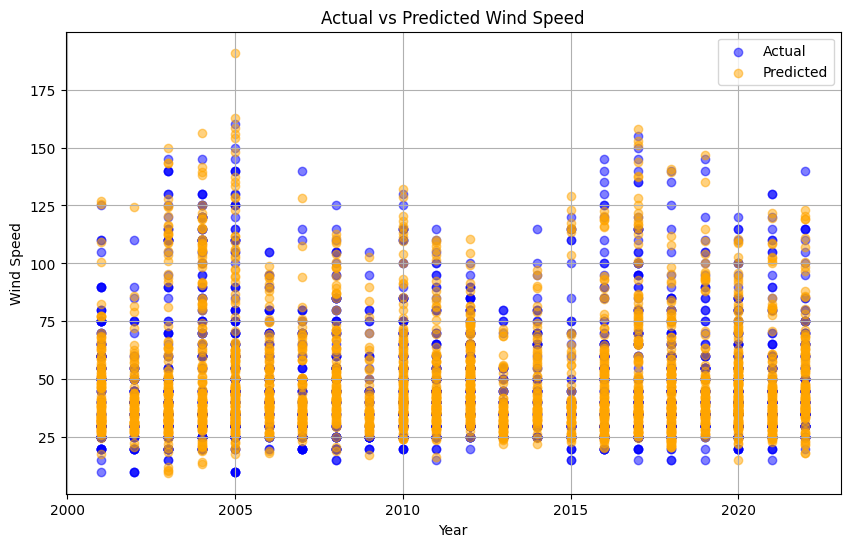

In [12]:
# Plot the actual vs predicted wind values with a scatter plot
plt.figure(figsize=(10, 6))

# Scatter plot for actual data
plt.scatter(X_test['YEAR'], y_test, color='blue', label='Actual', alpha=0.5)

# Scatter plot for predicted data
plt.scatter(X_test['YEAR'], predictions, color='orange', label='Predicted', alpha=0.5)

plt.title('Actual vs Predicted Wind Speed')
plt.xlabel('Year')
plt.ylabel('Wind Speed')
plt.legend()
plt.grid(True)
plt.show()

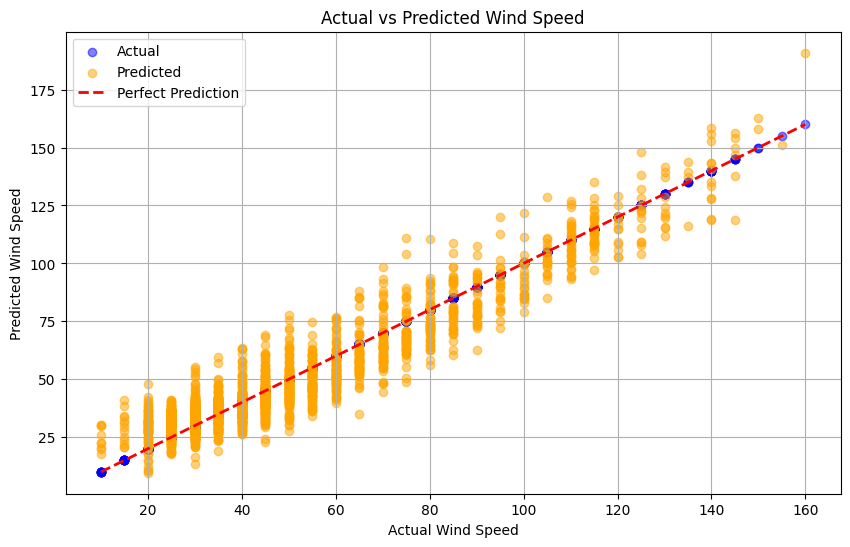

In [14]:
# Plotting actual vs predicted data with different colors
plt.figure(figsize=(10, 6))

# Plot actual data in blue
plt.scatter(y_test, y_test, color='blue', label='Actual', alpha=0.5)

# Plot predicted data in orange
plt.scatter(y_test, predictions, color='orange', label='Predicted', alpha=0.5)

# Plot a line with a 1:1 slope for reference
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2, label='Perfect Prediction')

plt.title('Actual vs Predicted Wind Speed')
plt.xlabel('Actual Wind Speed')
plt.ylabel('Predicted Wind Speed')
plt.legend()
plt.grid(True)
plt.show()
